<h2>Track the progress of COVID-19 vaccination

* What vaccines are used and in which countries?
* What country is vaccinated more people?
* What country is vaccinated a larger percent from its population?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import seaborn as sns

In [6]:
country_vaccinations_df = pd.read_csv('country_vaccinations.csv')

In [7]:
country_vaccinations_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [8]:
country_vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              9576 non-null   object 
 1   iso_code                             9576 non-null   object 
 2   date                                 9576 non-null   object 
 3   total_vaccinations                   5772 non-null   float64
 4   people_vaccinated                    5167 non-null   float64
 5   people_fully_vaccinated              3608 non-null   float64
 6   daily_vaccinations_raw               4816 non-null   float64
 7   daily_vaccinations                   9393 non-null   float64
 8   total_vaccinations_per_hundred       5772 non-null   float64
 9   people_vaccinated_per_hundred        5167 non-null   float64
 10  people_fully_vaccinated_per_hundred  3608 non-null   float64
 11  daily_vaccinations_per_million

In [9]:
country_vaccinations_df['date'] = pd.to_datetime(country_vaccinations_df.date)
country_vaccinations_df = country_vaccinations_df.replace([np.inf, -np.inf], np.nan)
country_vaccinations_df = country_vaccinations_df.fillna(0)

In [10]:
country_vaccinations_df.shape

(9576, 15)

In [11]:
country_vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.576000e+03,9.576000e+03,9.576000e+03,9.576000e+03,9.576000e+03,9576.000000,9576.000000,9576.000000,9576.000000
mean,1.942940e+06,1.298500e+06,4.056506e+05,5.609628e+04,6.577066e+04,6.923449,4.608278,1.571713,2781.286967
std,9.434635e+06,6.085336e+06,2.725952e+06,2.909601e+05,2.621674e+05,16.286891,10.490747,5.747330,4962.102087
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.950000e+02,0.000000,0.000000,0.000000,326.000000
50%,2.233400e+04,5.850000e+03,0.000000e+00,0.000000e+00,5.578000e+03,0.380000,0.060000,0.000000,1356.000000
75%,5.290835e+05,3.308312e+05,4.199850e+04,1.470000e+04,2.733600e+04,6.282500,4.060000,0.780000,3413.250000
max,1.616884e+08,1.042135e+08,5.985815e+07,7.185000e+06,5.190143e+06,180.780000,95.850000,84.930000,118759.000000


## What vaccines are used and in which countries?

In [12]:
select_column = ['country',
                  'date','vaccines',
                  'total_vaccinations',
                  'people_vaccinated',
                  'people_fully_vaccinated',
                  'daily_vaccinations_raw',
                  'daily_vaccinations',
                  'total_vaccinations_per_hundred',
                  'people_vaccinated_per_hundred',
                  'people_fully_vaccinated_per_hundred',
                  'daily_vaccinations_per_million']

#### Pfizer/BioNTech

In [10]:
pfizer_bioNTech_vaccine = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Pfizer/BioNTech"][select_column].sort_values(by="total_vaccinations")

In [11]:
pfizer_bioNTech_vaccine.sample(10).style.background_gradient(cmap="CMRmap_r")

,country,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
6234,North Macedonia,2021-02-21 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,91.000000
6732,Panama,2021-02-09 00:00:00,Pfizer/BioNTech,12441.000000,0.000000,0.000000,0.000000,61.000000,0.290000,0.000000,0.000000,14.000000
3329,Gibraltar,2021-02-25 00:00:00,Pfizer/BioNTech,34600.000000,21591.000000,13009.000000,1229.000000,832.000000,102.700000,64.090000,38.610000,24695.000000
5791,Monaco,2021-02-26 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,7492.000000
1592,Cayman Islands,2021-02-22 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,442.000000,0.000000,0.000000,0.000000,6726.000000
3362,Gibraltar,2021-03-30 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,788.000000,0.000000,0.000000,0.000000,23389.000000
3633,Guernsey,2021-03-22 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,236.000000,0.000000,0.000000,0.000000,3520.000000
5805,Monaco,2021-03-12 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,165.000000,0.000000,0.000000,0.000000,4204.000000
1973,Costa Rica,2021-03-21 00:00:00,Pfizer/BioNTech,0.000000,0.000000,0.000000,0.000000,8181.000000,0.000000,0.000000,0.000000,1606.000000
5044,Lebanon,2021-03-02 00:00:00,Pfizer/BioNTech,47625.000000,0.000000,0.000000,1766.000000,3721.000000,0.700000,0.000000,0.000000,545.000000


#### Sputnik V

In [12]:
SputnikV_vaccine = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [13]:
SputnikV_vaccine.sample(10).style.background_gradient(cmap="CMRmap_r")

,country,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
118,Algeria,2021-02-10 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,3748.000000,0.000000,0.000000,0.000000,85.000000
1139,Bolivia,2021-02-04 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,627.000000,0.000000,0.000000,0.000000,54.000000
7539,San Marino,2021-03-12 00:00:00,Sputnik V,4806.000000,4806.000000,0.000000,522.000000,418.000000,14.160000,14.160000,0.000000,12317.000000
3644,Guinea,2021-03-22 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,2229.000000,0.000000,0.000000,0.000000,170.000000
4794,Kazakhstan,2021-03-07 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,3453.000000,0.000000,0.000000,0.000000,184.000000
6810,Paraguay,2021-03-19 00:00:00,Sputnik V,14707.000000,13332.000000,1375.000000,240.000000,980.000000,0.210000,0.190000,0.020000,137.000000
1190,Bolivia,2021-03-27 00:00:00,Sputnik V,263144.000000,174799.000000,88315.000000,3973.000000,13712.000000,2.250000,1.500000,0.760000,1175.000000
865,Belarus,2021-02-02 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,403.000000,0.000000,0.000000,0.000000,43.000000
4144,Iran,2021-03-06 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,3806.000000,0.000000,0.000000,0.000000,45.000000
4130,Iran,2021-02-20 00:00:00,Sputnik V,0.000000,0.000000,0.000000,0.000000,2131.000000,0.000000,0.000000,0.000000,25.000000


#### Oxford/AstraZeneca

In [14]:
oxford_astraZeneca_vaccine = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca"][select_column].sort_values(by="total_vaccinations")

In [15]:
oxford_astraZeneca_vaccine.sample(10).style.background_gradient(cmap="CMRmap_r")

,country,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
259,Antigua and Barbuda,2021-02-20 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,895.000000,0.000000,0.000000,0.000000,9139.000000
5915,Montserrat,2021-02-26 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,6601.000000
223,Anguilla,2021-02-16 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,316.000000,0.000000,0.000000,0.000000,21064.000000
5471,Maldives,2021-03-12 00:00:00,Oxford/AstraZeneca,188436.000000,0.000000,0.000000,1506.000000,7087.000000,34.860000,0.000000,0.000000,13111.000000
4815,Kenya,2021-03-13 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,932.000000,0.000000,0.000000,0.000000,17.000000
5443,Maldives,2021-02-12 00:00:00,Oxford/AstraZeneca,27367.000000,0.000000,0.000000,2040.000000,3300.000000,5.060000,0.000000,0.000000,6105.000000
745,Bangladesh,2021-02-25 00:00:00,Oxford/AstraZeneca,2850940.000000,2850940.000000,0.000000,177902.000000,143232.000000,1.730000,1.730000,0.000000,870.000000
7452,Saint Kitts and Nevis,2021-03-09 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,314.000000,0.000000,0.000000,0.000000,5903.000000
1125,Bhutan,2021-03-28 00:00:00,Oxford/AstraZeneca,183271.000000,183271.000000,0.000000,97322.000000,91636.000000,23.750000,23.750000,0.000000,118759.000000
8492,Sri Lanka,2021-03-23 00:00:00,Oxford/AstraZeneca,0.000000,0.000000,0.000000,0.000000,7246.000000,0.000000,0.000000,0.000000,338.000000


#### Moderna, Oxford/AstraZeneca, Pfizer/BioNTech

In [16]:
moderna_oxford_astraZeneca_pfizer_bioNTech = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"][select_column].sort_values(by="total_vaccinations")

In [17]:
moderna_oxford_astraZeneca_pfizer_bioNTech.sample(10).style.background_gradient(cmap="CMRmap_r")

,country,date,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3004,Finland,2021-03-24 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",847501.000000,759827.000000,87674.000000,17089.000000,17764.000000,15.300000,13.710000,1.580000,3206.000000
448,Austria,2021-01-07 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",10868.000000,10868.000000,0.000000,3156.000000,841.000000,0.120000,0.120000,0.000000,93.000000
4251,Ireland,2021-03-05 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",513322.000000,363601.000000,149721.000000,19449.000000,12465.000000,10.400000,7.360000,3.030000,2524.000000
5197,Lithuania,2021-02-27 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",238547.000000,165224.000000,73323.000000,699.000000,6893.000000,8.760000,6.070000,2.690000,2532.000000
2336,Denmark,2021-02-22 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",509289.000000,333164.000000,176125.000000,14615.000000,12720.000000,8.790000,5.750000,3.040000,2196.000000
6154,Netherlands,2021-03-25 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",0.000000,0.000000,0.000000,0.000000,35777.000000,0.000000,0.000000,0.000000,2088.000000
6976,Poland,2021-03-06 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3951104.000000,2526389.000000,1424715.000000,0.000000,92574.000000,10.440000,6.680000,3.760000,2446.000000
1367,Bulgaria,2021-03-30 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",458731.000000,365650.000000,93081.000000,13184.000000,9989.000000,6.600000,5.260000,1.340000,1438.000000
6530,Norway,2021-03-09 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",631492.000000,415471.000000,216021.000000,16710.000000,15916.000000,11.650000,7.660000,3.980000,2936.000000
3395,Greece,2021-01-26 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",197755.000000,184610.000000,13145.000000,17804.000000,14757.000000,1.900000,1.770000,0.130000,1416.000000


#### Oxford/AstraZeneca, Sputnik V

In [13]:
oxford_astraZeneca_sputnikV = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [14]:
oxford_astraZeneca_sputnikV.sample(10).style.background_gradient(cmap="CMRmap_r")

ValueError: a must be greater than 0 unless no samples are taken

#### Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V

In [20]:
pfizer_bioNTech_sinopharm_beijing_SputnikV = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [21]:
pfizer_bioNTech_sinopharm_beijing_SputnikV.sample(10).style.background_gradient(cmap="CMRmap_r")

ValueError: a must be greater than 0 unless no samples are taken

#### Oxford/AstraZeneca, Sinovac

In [ ]:
oxford_astraZeneca_sinovac = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Sinovac"][select_column].sort_values(by="total_vaccinations")

In [ ]:
oxford_astraZeneca_sinovac.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Sinopharm/Beijing

In [ ]:
sinopharm_beijing = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Sinopharm/Beijing"][select_column].sort_values(by="total_vaccinations")

In [ ]:
sinopharm_beijing.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Moderna, Pfizer/BioNTech

In [ ]:
moderna_pfizer_bioNTech = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Moderna, Pfizer/BioNTech"][select_column].sort_values(by="total_vaccinations")

In [ ]:
moderna_pfizer_bioNTech.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Pfizer/BioNTech, Sinovac

In [ ]:
pfizer_bioNTech_sinovac = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Pfizer/BioNTech, Sinovac"][select_column].sort_values(by="total_vaccinations")

In [ ]:
pfizer_bioNTech_sinovac.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac

In [ ]:
sinopharm_beijing_sinopharm_wuhan_sinovac = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Pfizer/BioNTech, Sinovac"][select_column].sort_values(by="total_vaccinations")

In [ ]:
sinopharm_beijing_sinopharm_wuhan_sinovac.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Oxford/AstraZeneca, Pfizer/BioNTech

In [ ]:
oxford_astraZeneca_pfizer_bioNTech = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Pfizer/BioNTech"][select_column].sort_values(by="total_vaccinations")

In [ ]:
oxford_astraZeneca_pfizer_bioNTech.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V

In [ ]:
moderna_oxford_astraZeneca_pfizer_bioNTech_sinopharm_beijing_sputnikV = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [ ]:
moderna_oxford_astraZeneca_pfizer_bioNTech_sinopharm_beijing_sputnikV.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Covaxin, Oxford/AstraZeneca

In [ ]:
covaxin_oxford_astraZeneca = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Covaxin, Oxford/AstraZeneca"][select_column].sort_values(by="total_vaccinations")

In [ ]:
covaxin_oxford_astraZeneca.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Sinovac

In [ ]:
sinovac_vaccine = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Sinovac"][select_column].sort_values(by="total_vaccinations")

In [ ]:
sinovac_vaccine.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V

In [ ]:
oxford_astraZeneca_pfizer_bioNTech_sputnikV = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [ ]:
oxford_astraZeneca_pfizer_bioNTech_sputnikV.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Oxford/AstraZeneca, Sinopharm/Beijing

In [ ]:
oxford_astraZeneca_sinopharm_beijing = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [ ]:
oxford_astraZeneca_sinopharm_beijing.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V

In [ ]:
oxford_astraZeneca_sinopharm_beijing_sputnikV = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V"][select_column].sort_values(by="total_vaccinations")

In [ ]:
oxford_astraZeneca_sinopharm_beijing_sputnikV.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Johnson&Johnson

In [ ]:
johnson_johnson_vaccine = country_vaccinations_df[country_vaccinations_df["vaccines"]=="Johnson&Johnson"][select_column].sort_values(by="total_vaccinations")

In [ ]:
johnson_johnson_vaccine.sample(10).style.background_gradient(cmap="CMRmap_r")

#### Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V

In [ ]:
country_vaccinations_df[country_vaccinations_df["vaccines"]=="Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V"][select_column].sort_values(by="total_vaccinations").sample(10).style.background_gradient(cmap="CMRmap_r")

## What countries vaccinated more people?

In [26]:
top_country_vaccinated = country_vaccinations_df.groupby('country')['total_vaccinations'].max()

In [39]:
top_country_vaccinated = top_country_vaccinated.sort_values(ascending= False)[:15]

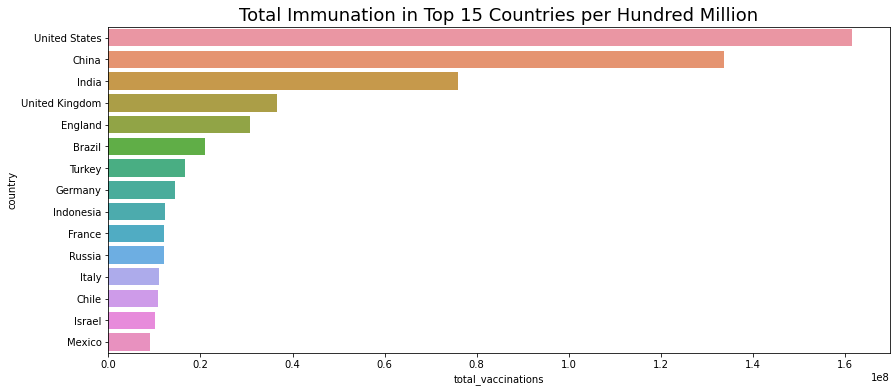

In [42]:
plt.figure(figsize=(14,6))
plt.title('Total Immunation in Top 15 Countries per Hundred Million', {'fontsize': 18})
sns.barplot(y=top_country_vaccinated.index, x=top_country_vaccinated);

#### Inspecting time series and rolling mean:

In [15]:
crossing1 = country_vaccinations_df[['date', 'total_vaccinations']].groupby('date').sum()

In [16]:
tseries = country_vaccinations_df.groupby(['date'])['total_vaccinations'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'total_vaccinations'})
tseries = tseries.set_index('date')

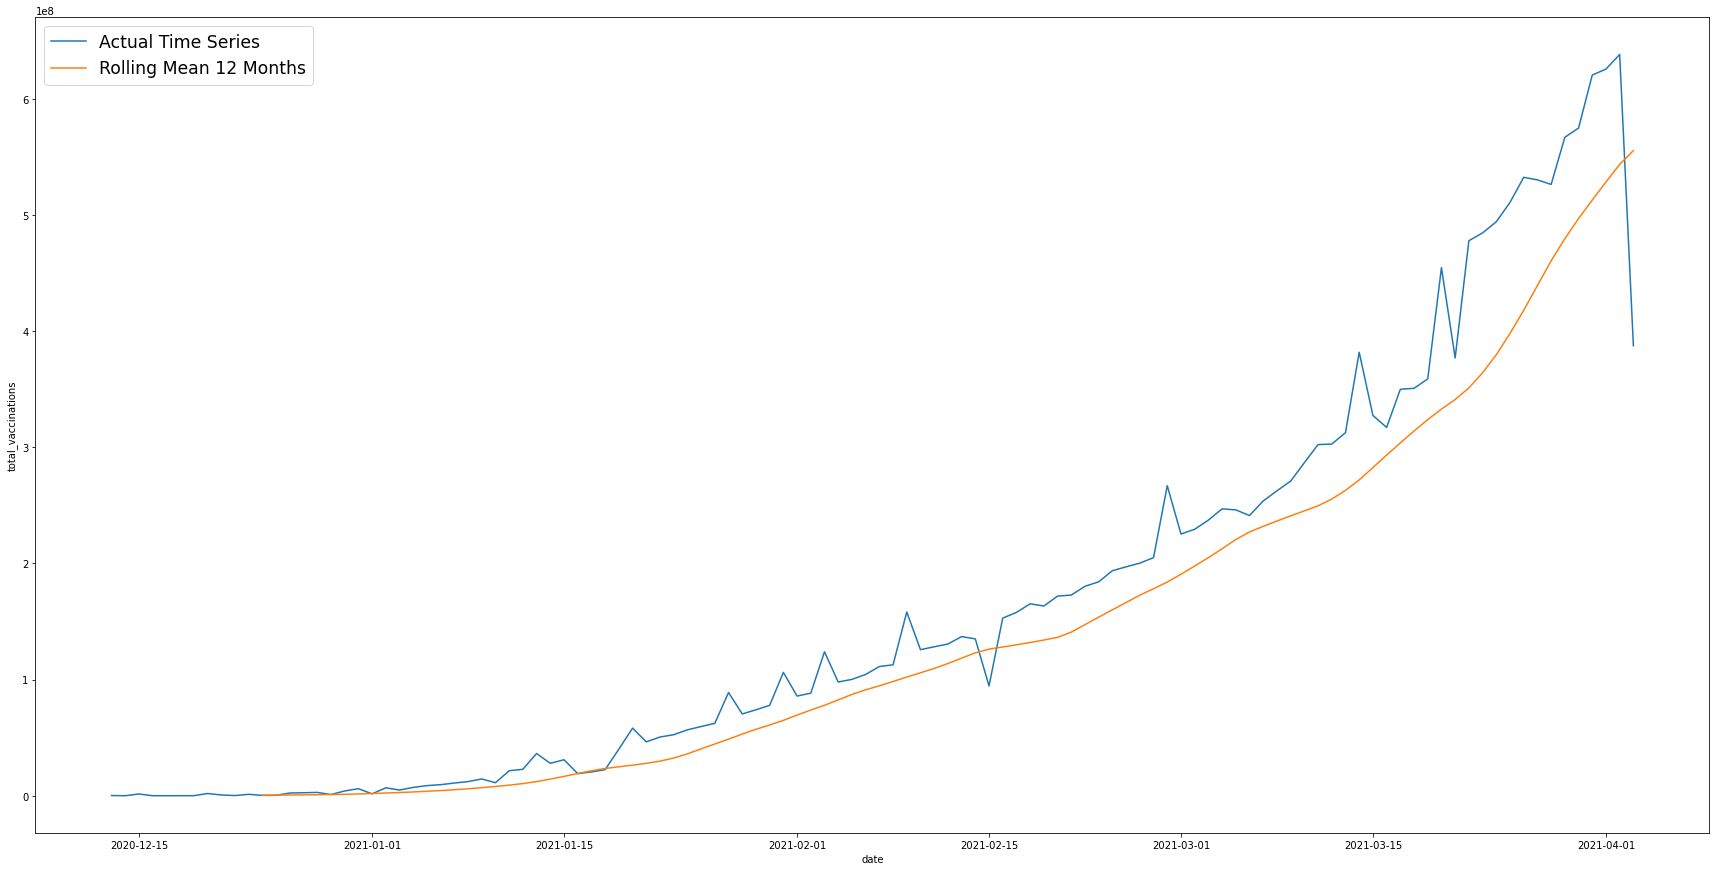

In [17]:
fig = plt.subplots(figsize=(30, 15))

g = sns.lineplot(x=tseries.index, y='total_vaccinations',
                 data=tseries, label="Actual Time Series")

rmean = crossing1.rolling(12, win_type='triang').mean()

g = sns.lineplot(x=rmean.index, y='total_vaccinations',
                 data=rmean, label="Rolling Mean 12 Months")

plt.legend(fontsize='xx-large')
plt.show()

## What country is vaccinated a larger percent from its population?


<p><b>Total vaccinations per hundred</b> - ratio (in percent) between vaccination number and total population up to the date in the country</p>

In [22]:
total_per_hundred = country_vaccinations_df.sort_values(by='total_vaccinations_per_hundred', ascending=False)[:7000]

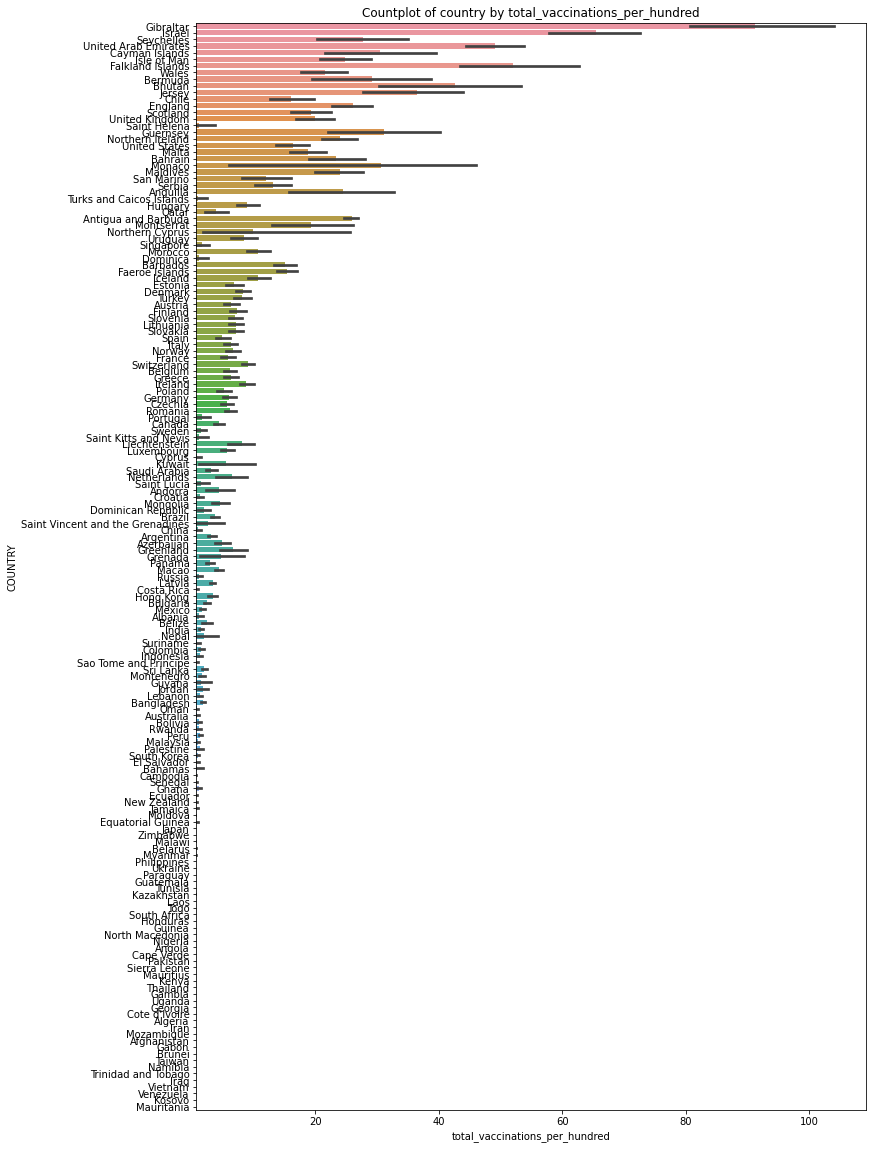

In [23]:
figure = plt.figure(figsize=(12,20))
sns.barplot(y=total_per_hundred.country, x=total_per_hundred.total_vaccinations_per_hundred)
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('total_vaccinations_per_hundred')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by total_vaccinations_per_hundred')
plt.show()

<p><b>Total number of people vaccinated per hundred</b> - ratio (in percent) between population immunized and total population up to the date in the country</p>

In [24]:
total_people_vaccinated_per_hundred = country_vaccinations_df.sort_values(by='people_vaccinated_per_hundred', ascending=False)[:7000]

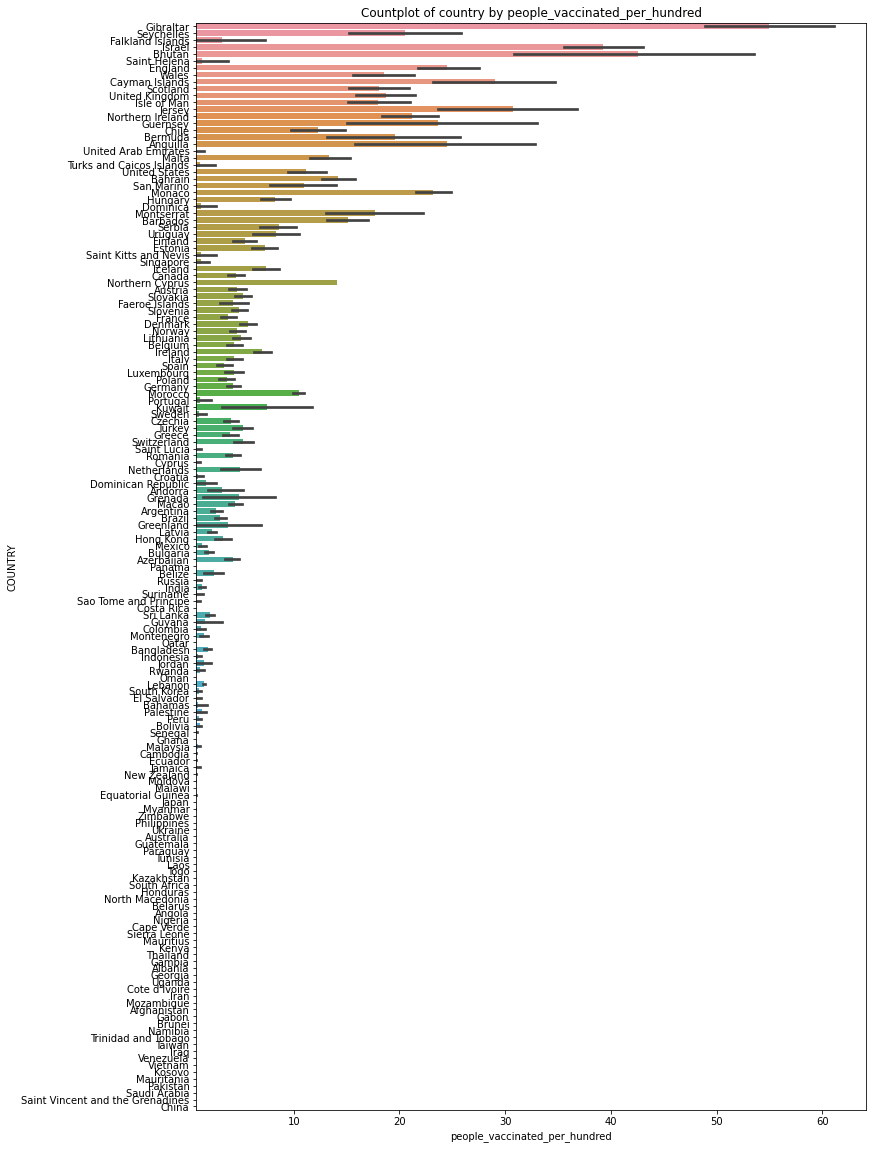

In [25]:
figure = plt.figure(figsize=(12,20))
sns.barplot(y=total_people_vaccinated_per_hundred.country, x=total_people_vaccinated_per_hundred.people_vaccinated_per_hundred)
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by people_vaccinated_per_hundred')
plt.show()